In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
def show_column_values(column: str, count: int):
    for i in data.loc[0:count, column]:
        print(i)

In [3]:
def build_barplot(data, column_name=None):
    """
    Универсальная функция для построения barplot
    data - DataFrame с данными
    column_name - опционально, если нужно посчитать value_counts
    """
    if column_name:
        value_counts = data[column_name].value_counts()
        df_plot = pd.DataFrame({
            'category': value_counts.index,
            'count': value_counts.values
        })
    else:
        values = []
        for i in data.values:
            values.extend(i)
        df_plot = pd.DataFrame({
            'category': data.index,
            'count': values
        })

    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=df_plot, x='category', y='count', palette='viridis', hue="count")
    
    for i, row in df_plot.iterrows():
        ax.text(i, row['count'] + 100, str(row['count']), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.title('Distribution of Anime Genres', fontsize=14, pad=20)
    plt.xlabel('Genres')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    return df_plot

In [4]:
data = pd.read_csv("anime_dataset.csv")

In [5]:
data.shape

(28858, 58)

In [6]:
data.head(5)

,mal_id,url,approved,title,title_english,title_japanese,title_synonyms,image_jpg_url,image_jpg_small_url,image_jpg_large_url,...,broadcast_time,broadcast_timezone,broadcast_string,producers,licensors,studios,genres,explicit_genres,themes,demographics
0,1,https://myanimelist.net/anime/1/Cowboy_Bebop,True,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,NaN,https://cdn.myanimelist.net/images/anime/4/196...,https://cdn.myanimelist.net/images/anime/4/196...,https://cdn.myanimelist.net/images/anime/4/196...,...,01:00,Asia/Tokyo,Saturdays at 01:00 (JST),"Bandai Visual, Victor Entertainment, Audio Pla...",Funimation,Sunrise,"Action, Award Winning, Sci-Fi",NaN,"Adult Cast, Space",NaN
1,5,https://myanimelist.net/anime/5/Cowboy_Bebop__...,True,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,Cowboy Bebop: Knockin' on Heaven's Door,https://cdn.myanimelist.net/images/anime/1439/...,https://cdn.myanimelist.net/images/anime/1439/...,https://cdn.myanimelist.net/images/anime/1439/...,...,NaN,NaN,NaN,"Sunrise, Bandai Visual","Sony Pictures Entertainment, Funimation",Bones,"Action, Sci-Fi",NaN,"Adult Cast, Space",NaN
2,6,https://myanimelist.net/anime/6/Trigun,True,Trigun,Trigun,トライガン,NaN,https://cdn.myanimelist.net/images/anime/1130/...,https://cdn.myanimelist.net/images/anime/1130/...,https://cdn.myanimelist.net/images/anime/1130/...,...,01:15,Asia/Tokyo,Thursdays at 01:15 (JST),Victor Entertainment,Funimation,Madhouse,"Action, Adventure, Sci-Fi",NaN,Adult Cast,Shounen
3,7,https://myanimelist.net/anime/7/Witch_Hunter_R...,True,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),WHR,https://cdn.myanimelist.net/images/anime/10/19...,https://cdn.myanimelist.net/images/anime/10/19...,https://cdn.myanimelist.net/images/anime/10/19...,...,01:25,Asia/Tokyo,Wednesdays at 01:25 (JST),"Bandai Visual, Dentsu, Victor Entertainment","Funimation, Bandai Entertainment",Sunrise,"Action, Drama, Mystery, Supernatural",NaN,Detective,NaN
4,8,https://myanimelist.net/anime/8/Bouken_Ou_Beet,True,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,Adventure King Beet,https://cdn.myanimelist.net/images/anime/7/215...,https://cdn.myanimelist.net/images/anime/7/215...,https://cdn.myanimelist.net/images/anime/7/215...,...,18:30,Asia/Tokyo,Thursdays at 18:30 (JST),"TV Tokyo, Dentsu",Illumitoon Entertainment,Toei Animation,"Action, Adventure, Fantasy",NaN,NaN,Shounen


In [7]:
print(f"data shape: {data.shape}")
data.info()

data shape: (28858, 58)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28858 entries, 0 to 28857
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   mal_id                     28858 non-null  int64  
 1   url                        28858 non-null  object 
 2   approved                   28858 non-null  bool   
 3   title                      28858 non-null  object 
 4   title_english              12435 non-null  object 
 5   title_japanese             28737 non-null  object 
 6   title_synonyms             14266 non-null  object 
 7   image_jpg_url              28858 non-null  object 
 8   image_jpg_small_url        28858 non-null  object 
 9   image_jpg_large_url        28858 non-null  object 
 10  image_webp_url             28858 non-null  object 
 11  image_webp_small_url       28858 non-null  object 
 12  image_webp_large_url       28858 non-null  object 
 13  trailer_youtube_id    

In [8]:
data[["approved"]].value_counts()

approved
True        28858
Name: count, dtype: int64

## Type

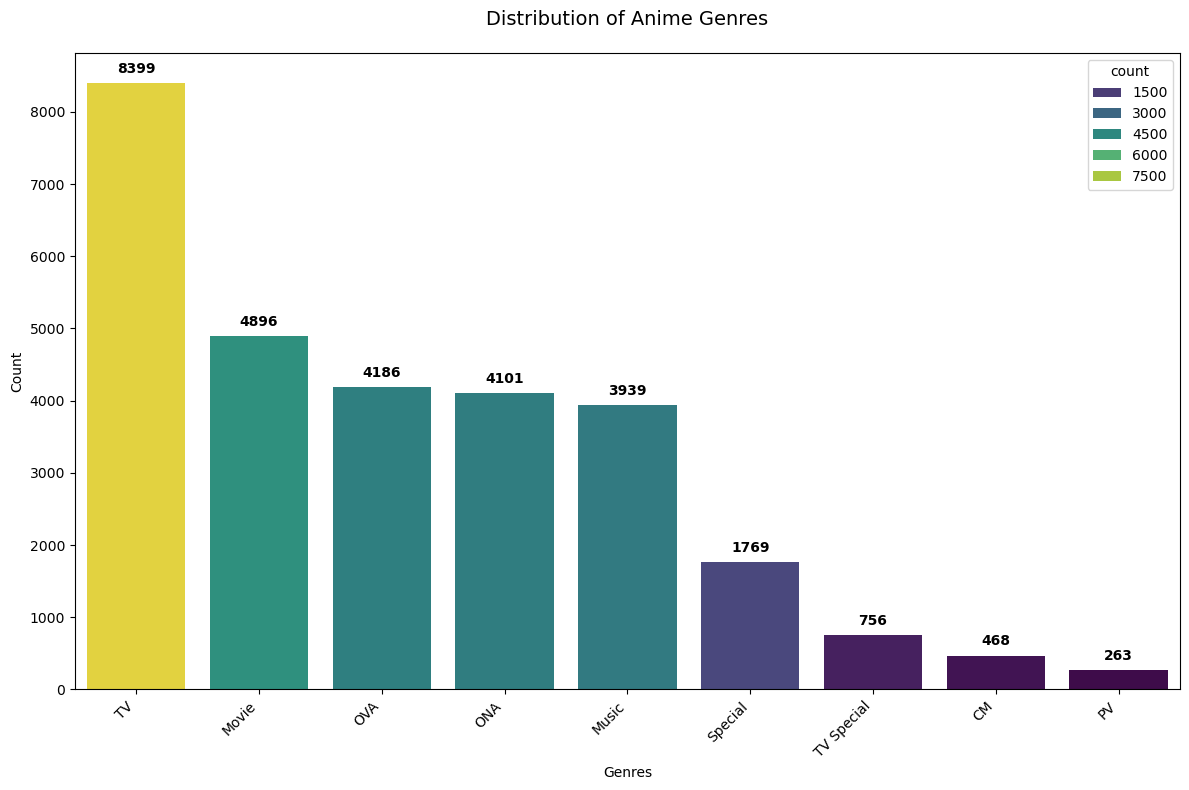

,category,count
0,TV,8399
1,Movie,4896
2,OVA,4186
3,ONA,4101
4,Music,3939
5,Special,1769
6,TV Special,756
7,CM,468
8,PV,263


In [9]:
build_barplot(data, "type")

## Genres

In [13]:
show_column_values("image_jpg_large_url", 10)

https://cdn.myanimelist.net/images/anime/4/19644l.jpg
https://cdn.myanimelist.net/images/anime/1439/93480l.jpg
https://cdn.myanimelist.net/images/anime/1130/120002l.jpg
https://cdn.myanimelist.net/images/anime/10/19969l.jpg
https://cdn.myanimelist.net/images/anime/7/21569l.jpg
https://cdn.myanimelist.net/images/anime/1079/133529l.jpg
https://cdn.myanimelist.net/images/anime/1301/133577l.jpg
https://cdn.myanimelist.net/images/anime/12/49655l.jpg
https://cdn.myanimelist.net/images/anime/9/10521l.jpg
https://cdn.myanimelist.net/images/anime/10/18793l.jpg
https://cdn.myanimelist.net/images/anime/1141/142503l.jpg


In [11]:
genres_data = data[["genres"]].copy()

In [50]:
genres_data.head()

,genres
0,"Action, Award Winning, Sci-Fi"
1,"Action, Sci-Fi"
2,"Action, Adventure, Sci-Fi"
3,"Action, Drama, Mystery, Supernatural"
4,"Action, Adventure, Fantasy"


In [43]:
genres_data = genres_data.dropna()

In [45]:
genres_data.isna().sum()

genres    0
dtype: int64

In [47]:
genres_data.shape

(22914, 1)

In [54]:
list_genres = []

In [55]:
for genres in genres_data["genres"]:
    for genre in genres.split(", "):
        list_genres.append(genre.strip())

In [79]:
count_of_genres = dict(Counter(list_genres))

In [81]:
df_genres = pd.DataFrame.from_dict(count_of_genres, orient='index', columns=['count'])

In [136]:
df_genres = df_genres.sort_values("count", ascending=False)

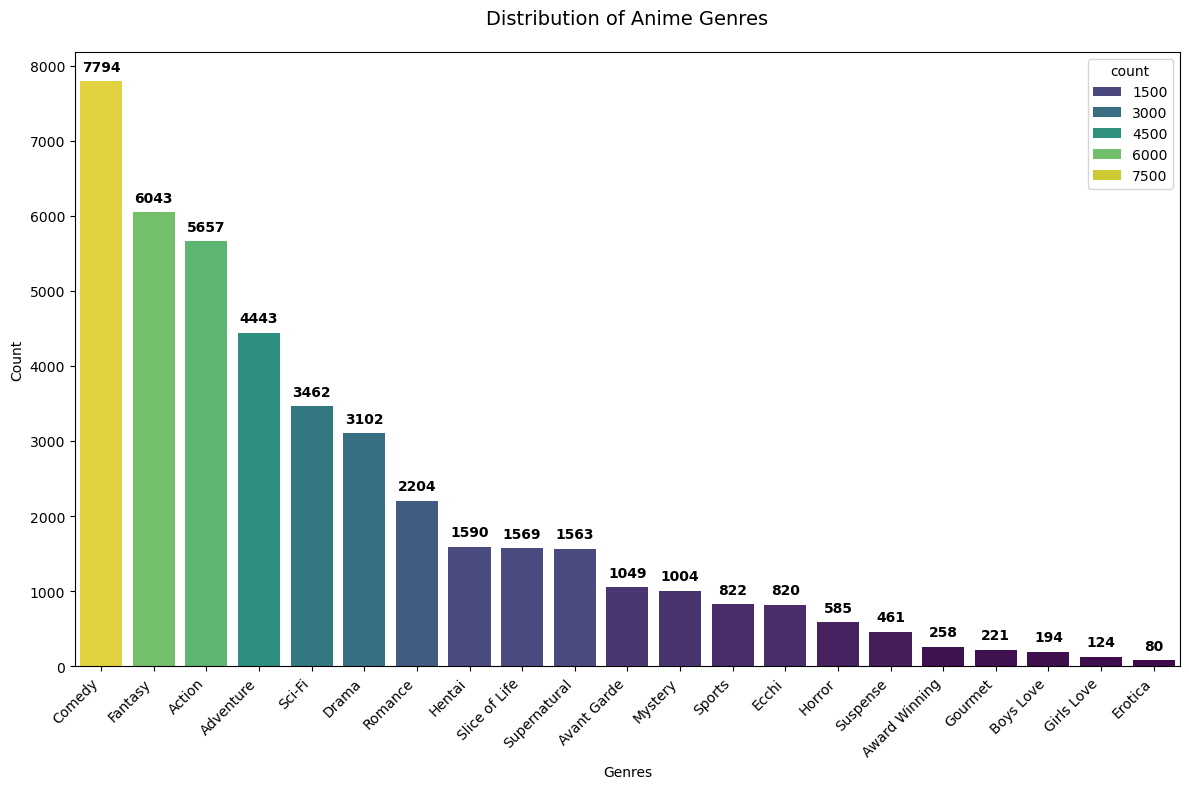

,category,count
0,Comedy,7794
1,Fantasy,6043
2,Action,5657
3,Adventure,4443
4,Sci-Fi,3462
5,Drama,3102
6,Romance,2204
7,Hentai,1590
8,Slice of Life,1569
9,Supernatural,1563


In [137]:
build_barplot(df_genres)

## Demographics

In [139]:
show_column_values("demographics", 5)

nan
nan
Shounen
nan
Shounen
Shounen


In [140]:
demographics_data = data[["demographics"]].copy()

In [179]:
demographics_data["demographics"].unique()

array(['Shounen', 'Josei', 'Seinen', 'Kids', 'Shoujo', 'Kids, Shounen',
       'Kids, Shoujo', 'Seinen, Shounen'], dtype=object)

In [142]:
demographics_data = demographics_data.dropna()

In [144]:
demographics_data.shape

(10765, 1)

In [146]:
demographics_data.isna().sum()

demographics    0
dtype: int64

In [181]:
list_dmgr = []
for dmgs in demographics_data["demographics"]:
    for dmg in dmgs.split(", "):
        list_dmgr.append(dmg.strip())

In [182]:
count_dmgr = dict(Counter(list_dmgr))

In [183]:
count_dmgr

{'Shounen': 2149, 'Josei': 160, 'Seinen': 1100, 'Kids': 6891, 'Shoujo': 522}

In [184]:
df_dmgr = pd.DataFrame.from_dict(count_dmgr, orient='index', columns=['count'])

In [185]:
df_dmgr = df_dmgr.sort_values("count", ascending=False)

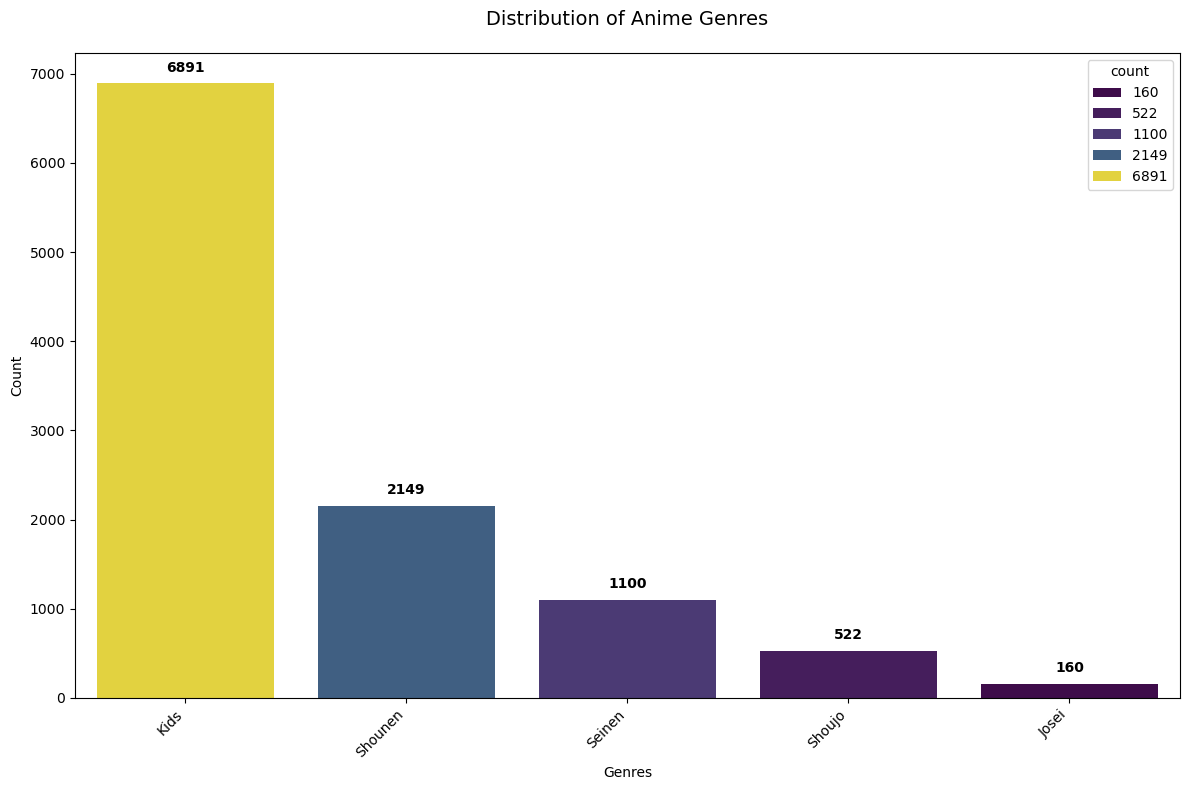

,category,count
0,Kids,6891
1,Shounen,2149
2,Seinen,1100
3,Shoujo,522
4,Josei,160


In [186]:
build_barplot(df_dmgr)

## Themes

In [187]:
show_column_values("themes", 5)

Adult Cast, Space
Adult Cast, Space
Adult Cast
Detective
nan
Team Sports


In [188]:
df_themes = data[["themes"]].copy()

In [190]:
df_themes = df_themes[["themes"]].dropna()

In [196]:
list_themes = []
for themes in df_themes["themes"]:
    for theme in themes.split(", "):
        list_themes.append(theme.strip())

In [197]:
count_themes = dict(Counter(list_themes))

In [199]:
df_thm = pd.DataFrame.from_dict(count_themes, orient='index', columns=['count'])

In [206]:
df_thm = df_thm.sort_values("count")

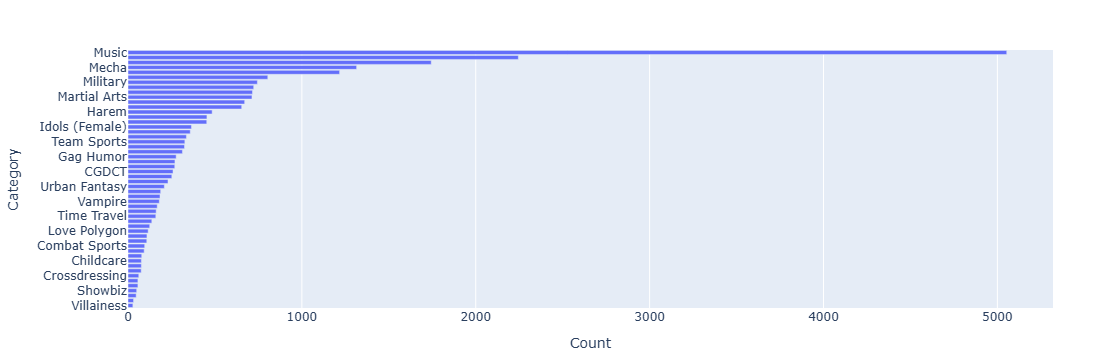

                   count
Music               5054
School              2245
Historical          1744
Mecha               1315
Anthropomorphic     1217
Parody               804
Military             744
Super Power          723
Adult Cast           716
Martial Arts         713
Space                671
Mythology            654
Harem                484
Isekai               454
Psychological        453
Idols (Female)       365
Mahou Shoujo         358
Strategy Game        336
Team Sports          327
Educational          325
Detective            313
Gag Humor            277
Gore                 270
Racing               269
CGDCT                259
Samurai              252
Workplace            230
Urban Fantasy        209
Iyashikei            188
Idols (Male)         184
Vampire              180
Video Game           168
Reincarnation        162
Time Travel          160
Pets                 137
Performing Arts      125
Love Polygon         116
Organized Crime      109
Otaku Culture        108


In [209]:
import plotly.express as px

fig = px.bar(
    x=df_thm['count'], 
    y=df_thm.index, 
    orientation='h',
    labels={'x': 'Count', 'y': 'Category'}
)
fig.update_layout(
    height=1500,
    margin=dict(l=50, r=50, t=50, b=50)
)
fig.show()

print(df_thm.sort_values("count", ascending=False))

In [5]:
data["title"].tolist()

['Cowboy Bebop',
 'Cowboy Bebop: Tengoku no Tobira',
 'Trigun',
 'Witch Hunter Robin',
 'Bouken Ou Beet',
 'Eyeshield 21',
 'Hachimitsu to Clover',
 'Hungry Heart: Wild Striker',
 'Initial D Fourth Stage',
 'Monster',
 'Naruto',
 'One Piece',
 'Tennis no Oujisama',
 'Ring ni Kakero 1',
 'School Rumble',
 'Sunabouzu',
 'Texhnolyze',
 'Trinity Blood',
 'Yakitate!! Japan',
 'Zipang',
 'Shinseiki Evangelion',
 'Shinseiki Evangelion Movie: Shi to Shinsei',
 'Shinseiki Evangelion Movie: Air/Magokoro wo, Kimi ni',
 'Kenpuu Denki Berserk',
 'Koukaku Kidoutai',
 'Black Cat: Toozakaru Neko',
 'Genmukan',
 'Samurai Spirits: Haten Gouma no Shou',
 'Kimera',
 'Kara no Kyoukai Movie 1: Fukan Fuukei',
 'Piano no Mori',
 'D.C.II: Da Capo II',
 'Shinreigari',
 'Meitantei Conan OVA 07: Agasa kara no Chousenjou! Agasa vs Conan & Shounen Tanteidan',
 'Juusenki L-Gaim',
 'Juusenki L-Gaim I: Pentagona Window + Lady Gavlet',
 'Juusenki L-Gaim II: Farewell My Lovely + Pentagona Dolls',
 'Juusenki L-Gaim III: 